# Simulate your income 
### Li Ruixue
### Part 1.


In [222]:
import numpy
import matplotlib.pyplot as pyplot
from matplotlib.ticker import MultipleLocator

def simulate_income(simulation_profile):
    '''
    Requires a simulation profile structured as a dictionary
    
    simulation_profile = {
        'sd_income'   : 0.1      #standard deviation of the income process
        'persistence' : 0.2,      #persistence
        'growth_rate' : 0.03,       #long-run growth rate of income
        'initial_income'    : 80000,       #average initial income
        'year_start'  : 2019,       #start year
        'year_work'    : 40,      #end year
        'number_simulations' : 10000,         #number of simulations to run
        'mean_error'           : 0,         #mean of error for income
    }
    '''
    
    #extract the parameters in the simulation profile
    numpy.random.seed(30000)
    number_years = simulation_profile['year_work']
    mean = simulation_profile['mean_error']
    sigma = simulation_profile['sd_income']
    rho = simulation_profile['persistence']
    inc_0 = simulation_profile['initial_income']
    n_people = simulation_profile['number_simulations']
    g = simulation_profile['growth_rate']
    
    #generate log normal errors
    log_normal_errors = numpy.random.normal(mean, sigma, (number_years + 1, n_people))
    
    #initialize log income
    ln_income = numpy.zeros((number_years + 1, n_people)) 
    
    #create income of year 2019
    ln_income[0, :] = numpy.log(inc_0) + log_normal_errors[0, :]

    #populate the rest of the years according to formula
    for year in range(1, number_years + 1):
        ln_income[year, :] = (1 - rho) * (numpy.log(inc_0) + g * year) + \
                                rho * ln_income[year - 1, :] + log_normal_errors[year, :]
    
    #expand log income into income
    lifetime_income = numpy.exp(ln_income)
    
    return lifetime_income
    

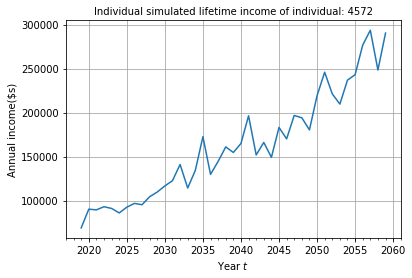

In [223]:
simulation_profile_1 = {
    'sd_income'   : 0.1,      #standard deviation of the income process
    'persistence' : 0.2,      #persistence
    'growth_rate' : 0.03,       #long-run growth rate of income
    'initial_income'    : 80000,       #average initial income
    'year_start'  : 2019,       #start year
    'year_work'    : 40,      #end year
    'number_simulations' : 10000,         #number of simulations to run
    'mean_error'           : 0         #mean of error for income
    }

lifetime_income_1 = simulate_income(simulation_profile_1)

#randomly pick a individual and plot the lifetime income
%matplotlib inline
years = numpy.arange(simulation_profile_1['year_start'], simulation_profile_1['year_start'] + 
                     simulation_profile_1['year_work'] + 1, 1)
individual = numpy.random.randint(1, 10000)
fig, ax = pyplot.subplots()
pyplot.plot(years, lifetime_income_1[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
pyplot.grid(b=True, which='major', color='0.65', linestyle='-')
pyplot.title('Individual simulated lifetime income of individual: ' + str(individual), fontsize=10)
pyplot.xlabel(r'Year $t$')
pyplot.ylabel(r'Annual income(\$s)')
pyplot.show()

### Part 2

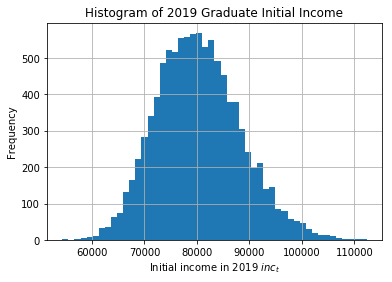

In [224]:
#plot the histogram of initial income
income_2019 = lifetime_income_1[0, :]
fig, ax = pyplot.subplots()
pyplot.hist(income_2019, 50)
pyplot.xlabel(r'Initial income in 2019 $inc_{t}$')
pyplot.ylabel('Frequency')
pyplot.title('Histogram of 2019 Graduate Initial Income')
pyplot.grid(True)
pyplot.show()

In [225]:
#sort the income and find the number of individuals that satisfy the criteria
income_2019.sort()
percent_100k = (1 - income_2019.searchsorted(100000, side = 'right'
                                            )/ simulation_profile_1['number_simulations']) * 100
percent_70k = (1 - income_2019.searchsorted(70000, side = 'right'
                                           ) / simulation_profile_1['number_simulations']) * 100
print(str(percent_100k) + '% of our class will earn more than $100,000 in the first year out of the program.')
print(str(percent_70k) + '% of our class will earn more than $70,000 in the first year out of the program.')


1.32% of our class will earn more than $100,000 in the first year out of the program.
91.04% of our class will earn more than $70,000 in the first year out of the program.


The distribution is symmetric and bell-curved and therefore appears to be normally distributed.

### Part 3

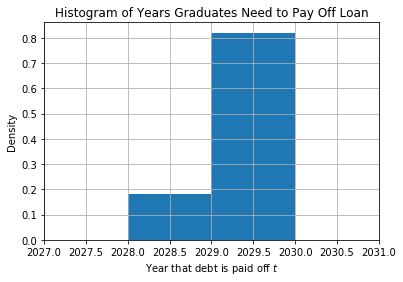

In [226]:
def pay_debt(simulation_profile, debt):
    '''
    Takes a simulation profile and amount of debt, 
    calculate the number of years needed to pay off the debt
    '''
    
    #generate income and initialization
    lifetime_income = simulate_income(simulation_profile)
    debt_payment = lifetime_income * 0.1
    n_people = simulation_profile['number_simulations']
    year_payment = [2019] * n_people 
    
    #calculate the number of years needed to pay the debt for each individual
    for individual in range(0, n_people):
        debt_paid = 0
        for year in range(0, simulation_profile["year_work"] + 1):
            debt_paid += debt_payment[year, individual]
            if debt_paid >= debt:
                year_payment[individual] +=year
                break
    return year_payment
    
    
def plot_loan_payment(year_payment):
    fig, ax = pyplot.subplots()
    pyplot.hist(year_payment, density = True, bins = range(min(year_payment), max(year_payment) + 1, 1))
    pyplot.xlim([min(year_payment) - 1, max(year_payment) + 1])
    pyplot.xlabel(r'Year that debt is paid off $t$')
    pyplot.ylabel('Density')
    pyplot.title('Histogram of Years Graduates Need to Pay Off Loan')
    pyplot.grid(True)
    pyplot.show()

year_payment = pay_debt(simulation_profile_1, 95000)
plot_loan_payment(year_payment)

In [227]:
#sort the number of years and calculate the percentage
year_payment.sort()
year_payment_array = numpy.asarray(year_payment)
percent_10years = year_payment_array.searchsorted(2029, side = 'left')\
                    / simulation_profile_1['number_simulations'] * 100
print(str(percent_10years) + '% of our class will pay off the loan in 10 years.')

17.98% of our class will pay off the loan in 10 years.


### Part 4

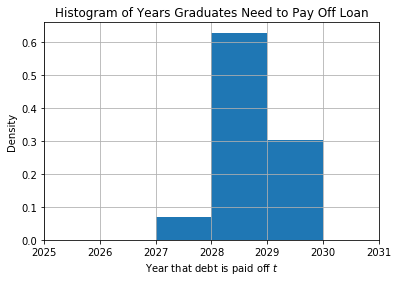

In [228]:
#change the simulation profile and recalculate
simulation_profile_2 = {
    'sd_income'   : 0.15,      #standard deviation of the income process
    'persistence' : 0.2,      #persistence
    'growth_rate' : 0.03,       #long-run growth rate of income
    'initial_income'    : 85000,       #average initial income
    'year_start'  : 2019,       #start year
    'year_work'    : 40,      #end year
    'number_simulations' : 10000,         #number of simulations to run
    'mean_error'           : 0         #mean of error for income
    }

year_payment = pay_debt(simulation_profile_2, 95000)
plot_loan_payment(year_payment)

In [229]:
year_payment.sort()
year_payment_array = numpy.asarray(year_payment)
percent_10years = year_payment_array.searchsorted(2029, side = 'left')\
                    / simulation_profile_1['number_simulations'] * 100
print(str(percent_10years) + '% of our class will pay off the loan in 10 years.')

69.82% of our class will pay off the loan in 10 years.
